__Title:__ Case Study 7: All Methods

__Authors:__ Will Butler, Robert (Reuven) Derner 

__Date:__ 12/4/23 

## Business Understanding

Firewall traffic

A cybersecur 

Data Source:

Provided by client with metadata dictionary regarding terms 

In [1]:
# Import data from github (next phase)
# url = 'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/log2.csv'
# data = pd.read_csv(url, encoding = "utf-8")

In [2]:
# Create a DataFrame from the data
#df = pd.read_csv(file_path, encoding = "utf-8")

## Data Quality
Verify data quality: Explain any missing trainues, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [3]:
file_path = 'final_project(5).csv'

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(file_path)

### Examine the data

In [6]:
df.shape

(160000, 51)

In [7]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


__Missing trainues__  
The dataset contains significant portion of missing trainues throughout the dataset, we will need to use various methods for imputation of the missing trainues.

In [8]:
df.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [9]:
# Features with Null trainues and Percent missing
null_df = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'trainue']
null_df['Percent'] = round((null_df['trainue'] / df.shape[0] * 100),2)

null_df

,Feature,trainue,Percent
0,x0,26,0.02
1,x1,25,0.02
2,x2,38,0.02
3,x3,37,0.02
4,x4,26,0.02
5,x5,37,0.02
6,x6,26,0.02
7,x7,27,0.02
8,x8,21,0.01
9,x9,30,0.02


In [10]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


### Examine any Correlations 

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [12]:
correlation_matrix = df.corr()

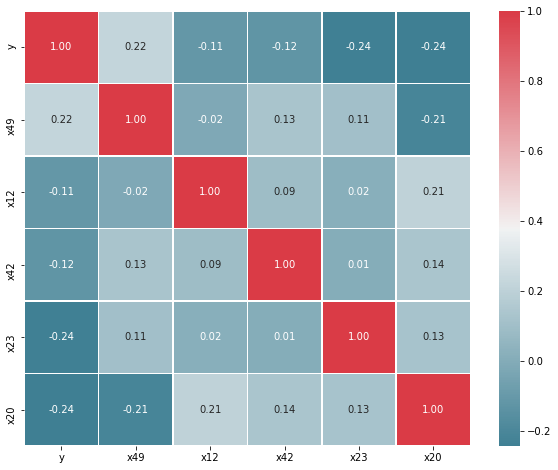

In [14]:
# Select correlations above 0.4 or below -0.4 for the target variable
target_corr = correlation_matrix['y']
target_corr = target_corr[(target_corr > 0.20) | (target_corr < -0.10)].sort_values(ascending=False)

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros((len(target_corr), len(target_corr)))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Customize the color palette if desired
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap for the selected correlations
sns.heatmap(correlation_matrix.loc[target_corr.index, target_corr.index], 
            annot=True, fmt=".2f", cmap=cmap, mask=mask, linewidths=.5)


plt.show()

There is limited relationships being examined through the corelation analysis. The most pronounced relationship with our target variable is between x20 & x23 having an inverse relationship at -0.24 indicating the lower x23 & x20 are the more likely to have a positive instance. 

## EDA Exploratory Data Analysis

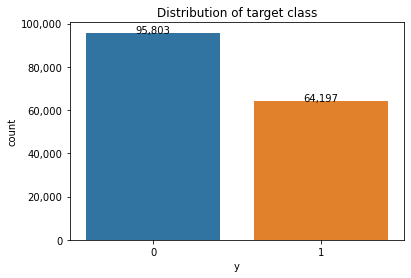

In [15]:
#Visualize the distribution of the target variable
ax = sns.countplot(x='y', data=df)
plt.title('Distribution of target class')

# Add annotations for the count of each class
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count:,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()


In [16]:
print(95803/160000)
print(64197/160000)

0.59876875
0.40123125


There is a bit of an imblance in the target class having a the event not occuring at 95,803 instances or 59.87%, while having the event occuring to be 64,197 instances or 40.12% out of a total number of recordings of the 160,000. 

df.shape

In [17]:
df.head(5)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


### Univariate Analysis

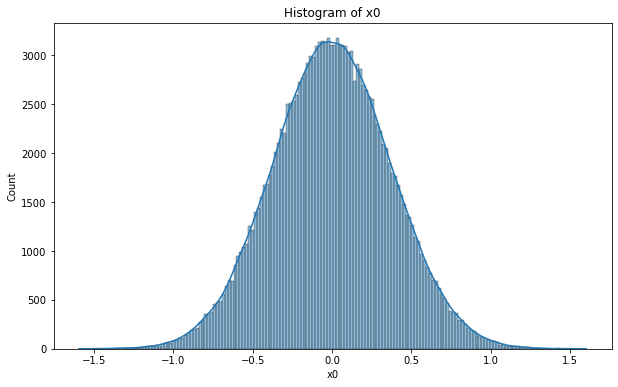

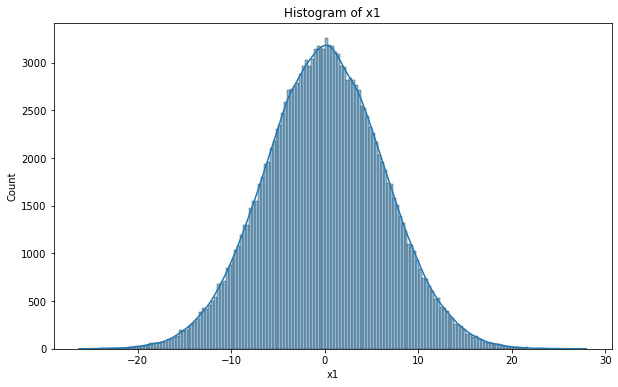

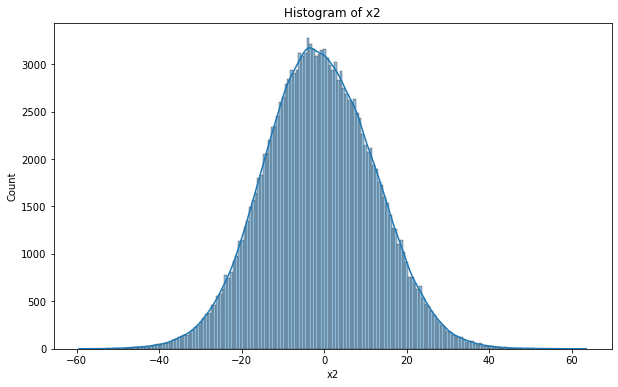

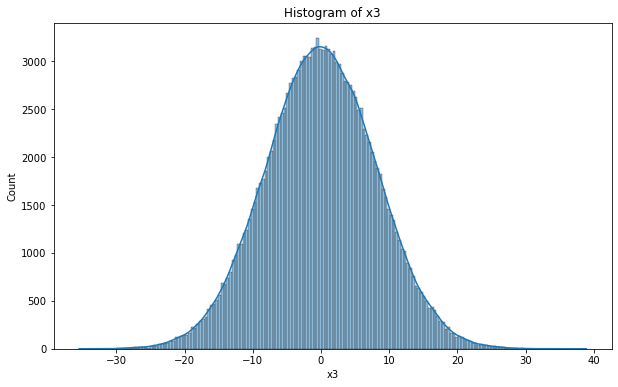

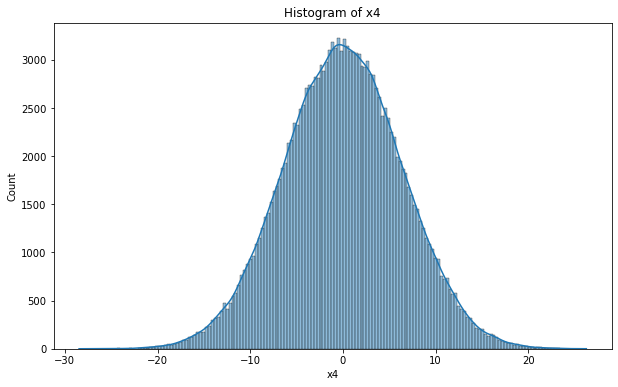

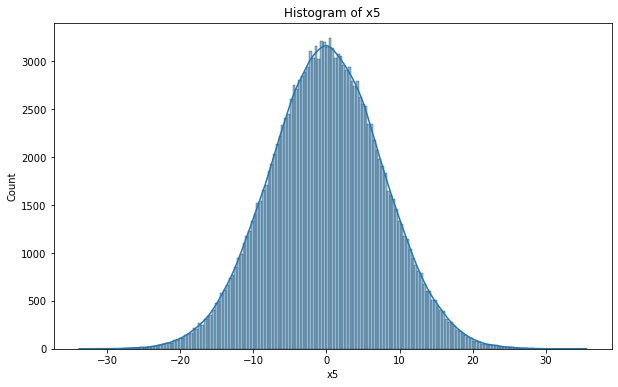

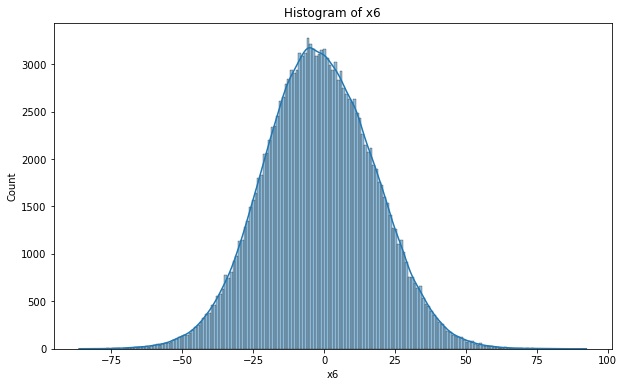

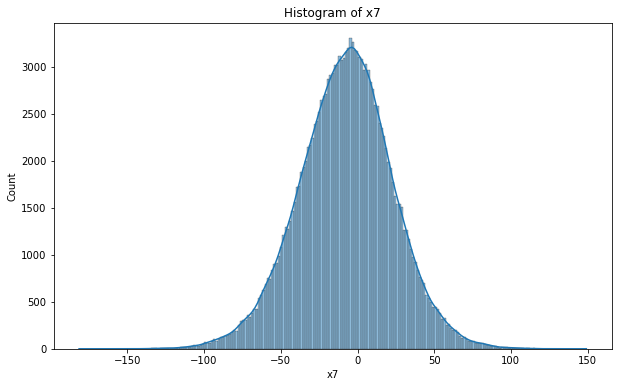

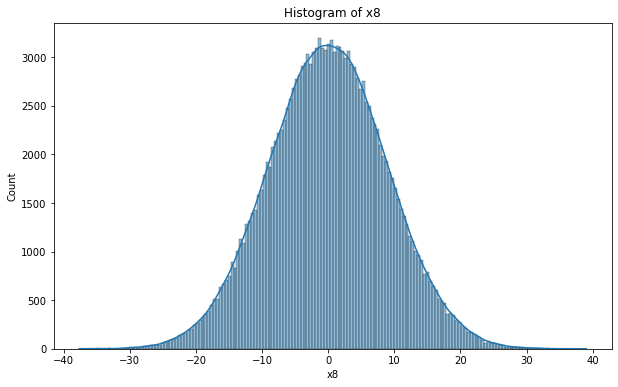

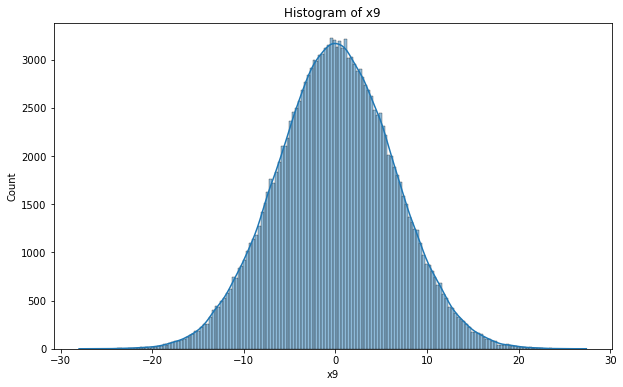

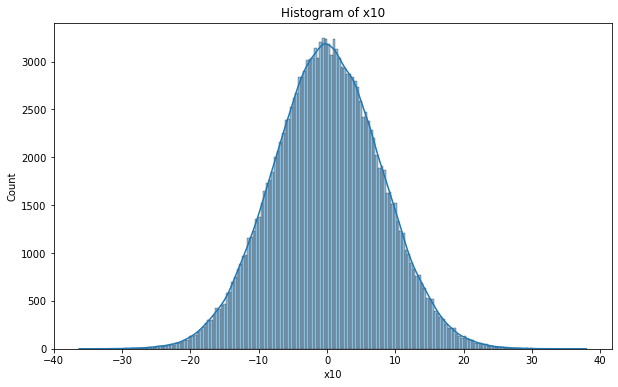

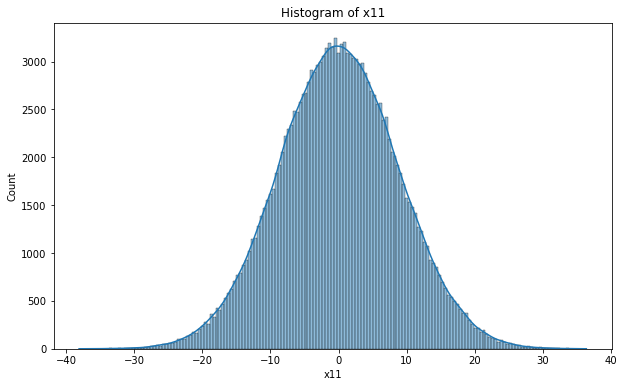

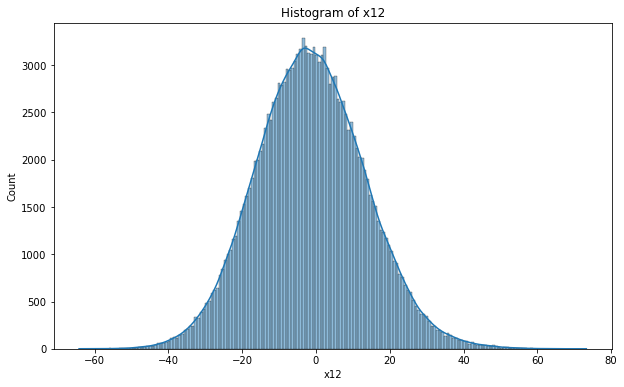

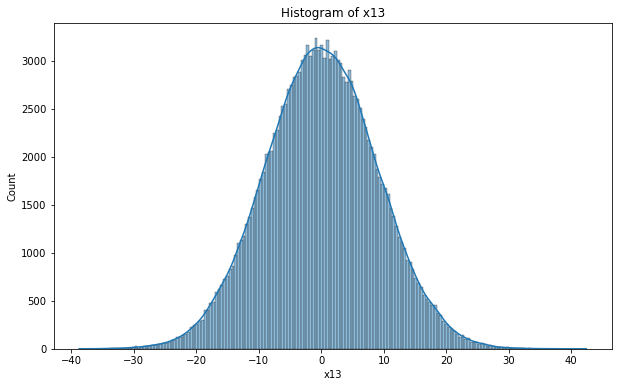

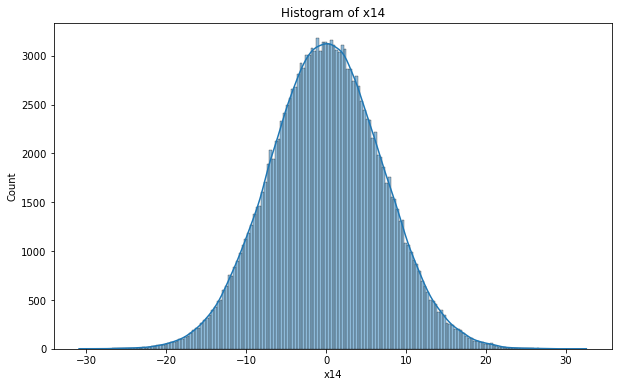

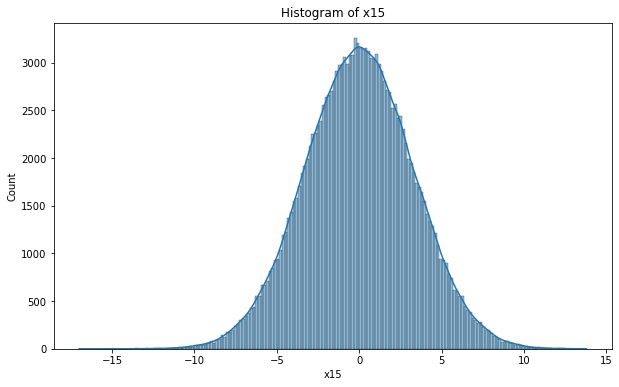

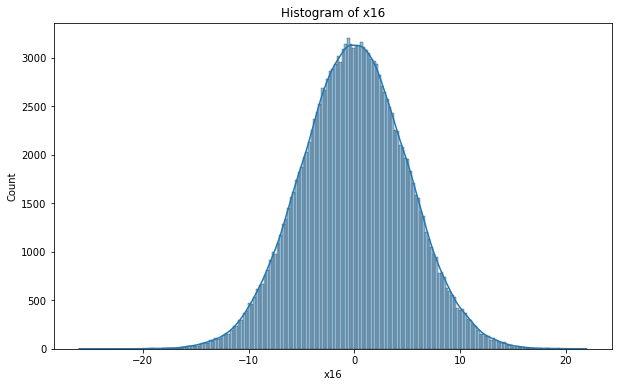

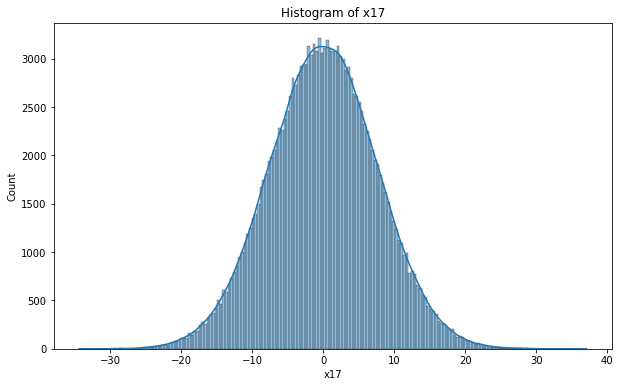

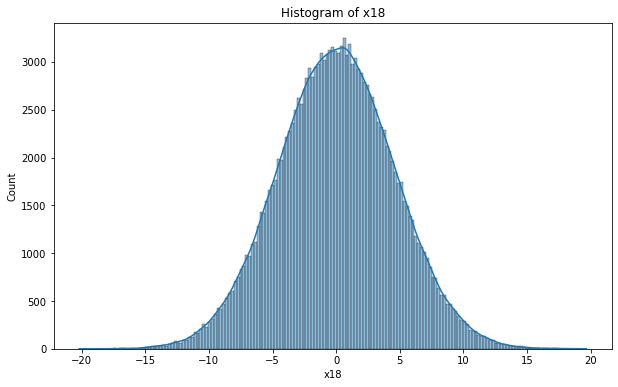

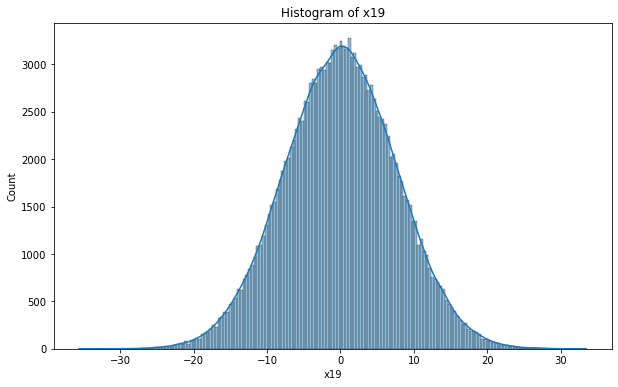

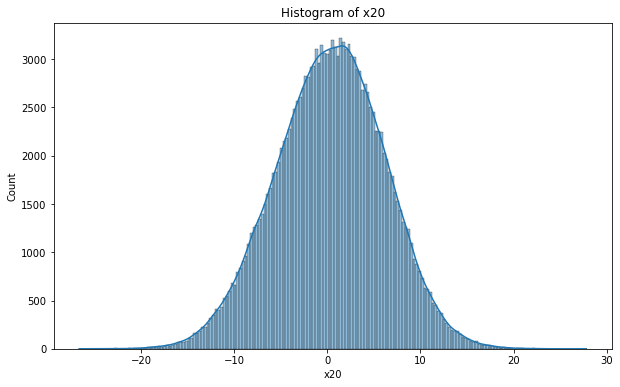

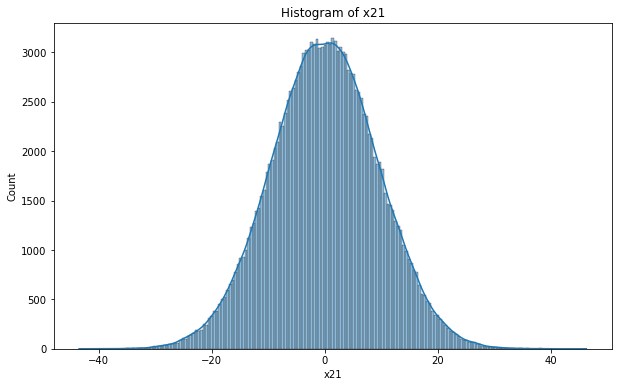

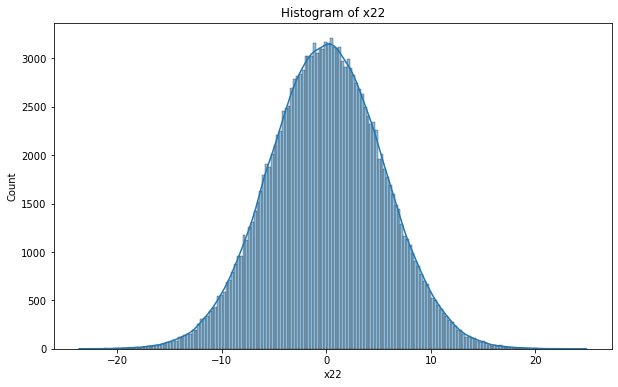

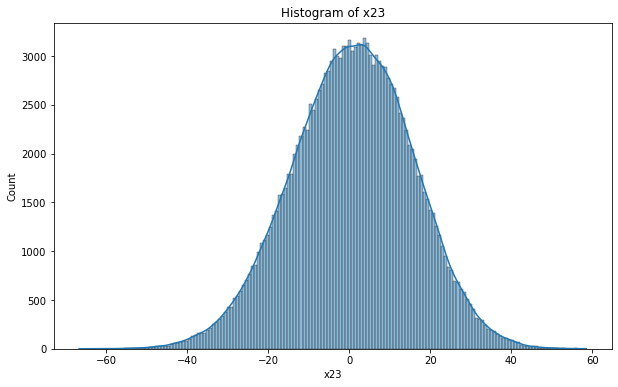

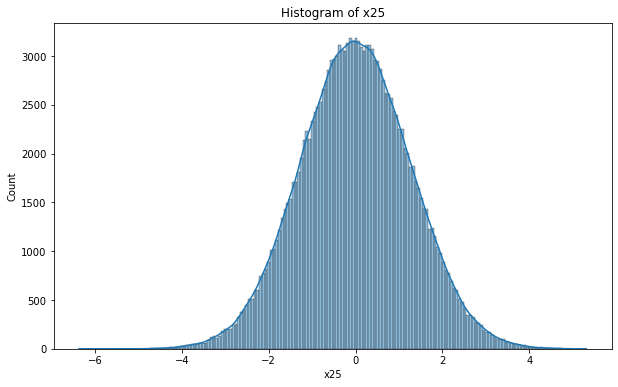

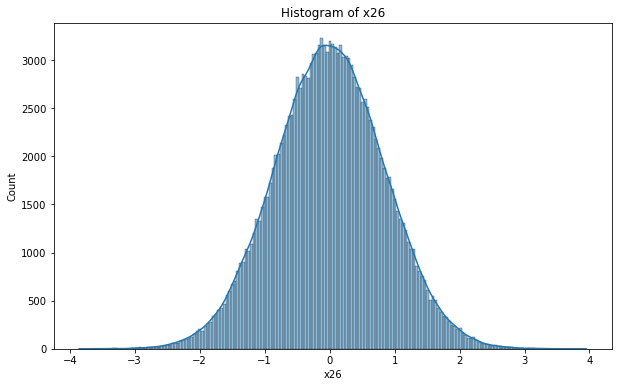

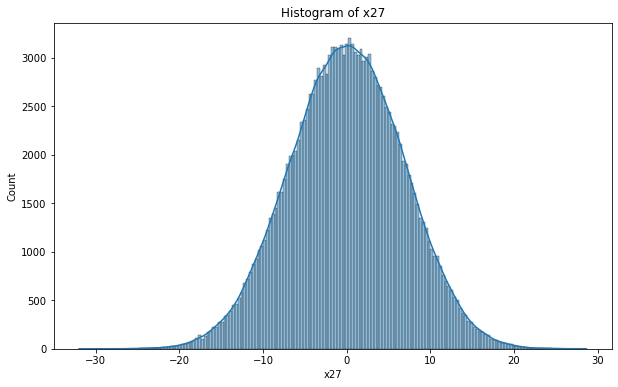

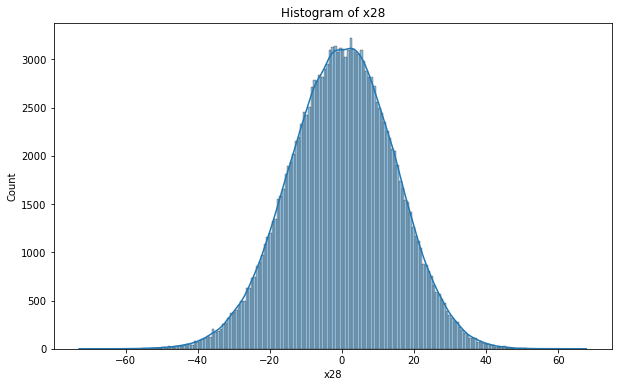

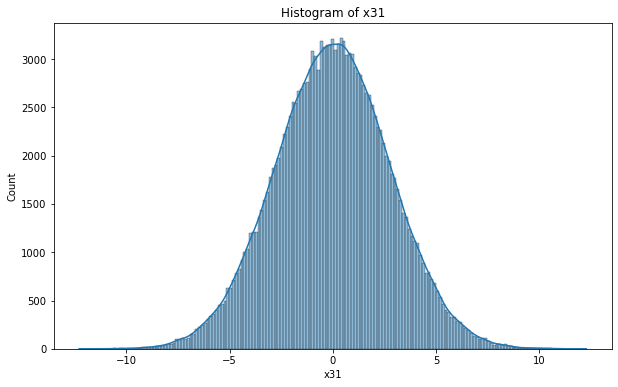

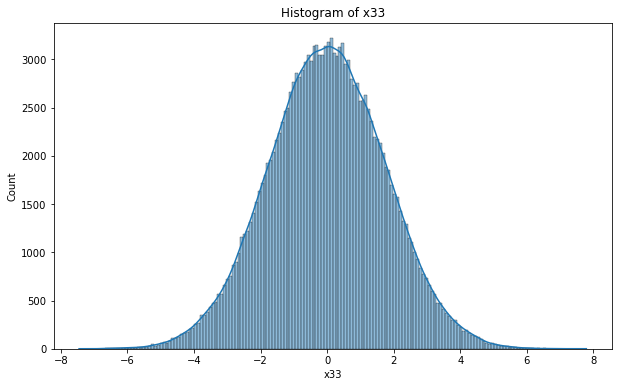

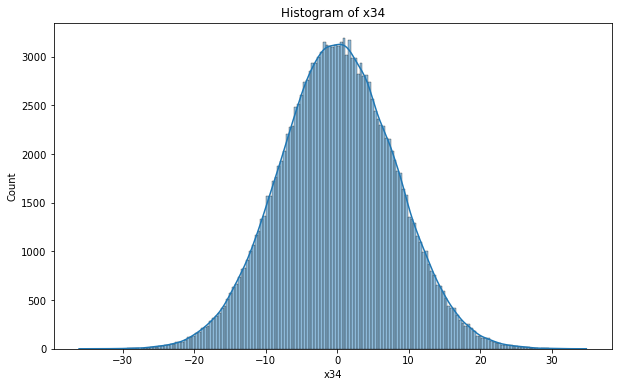

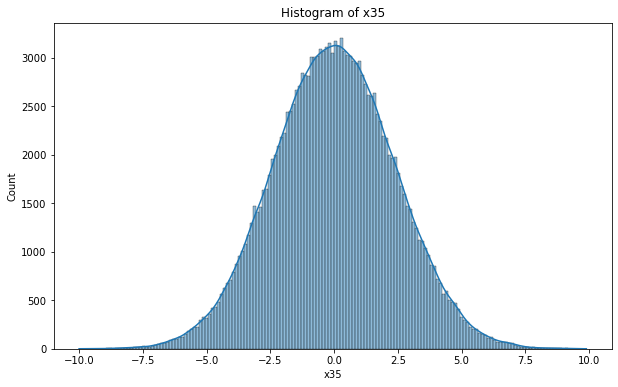

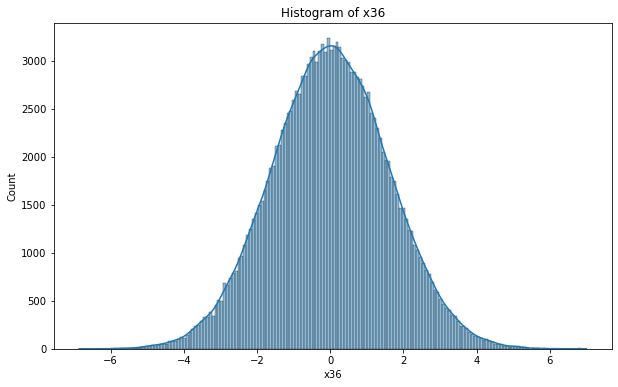

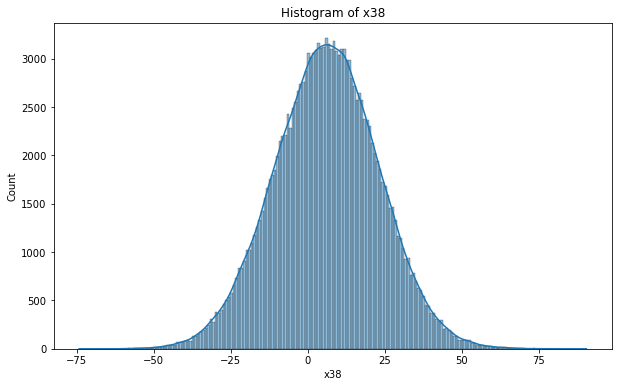

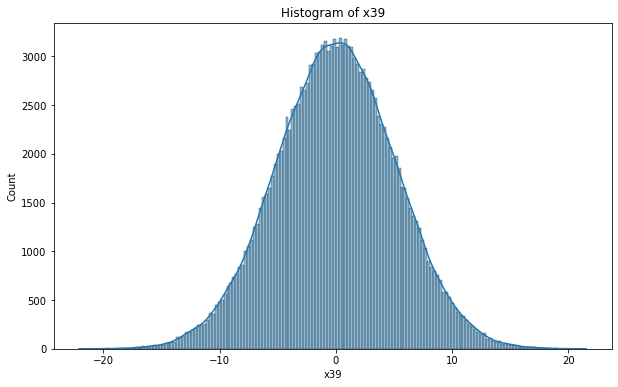

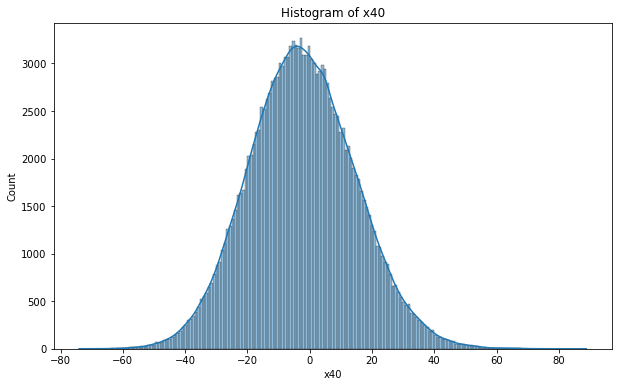

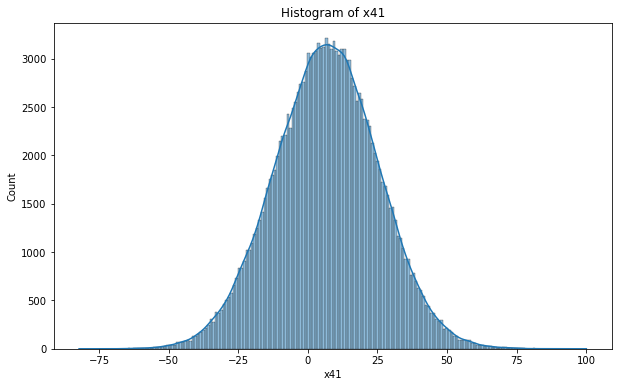

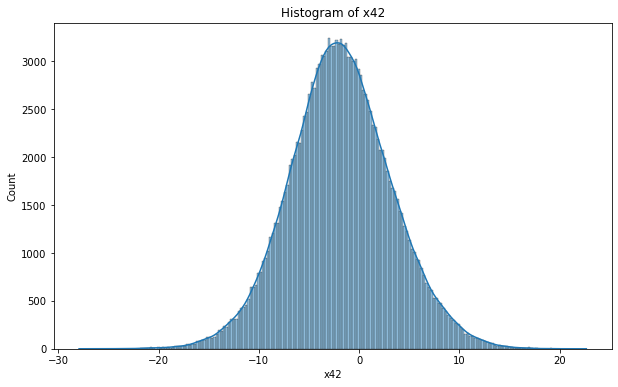

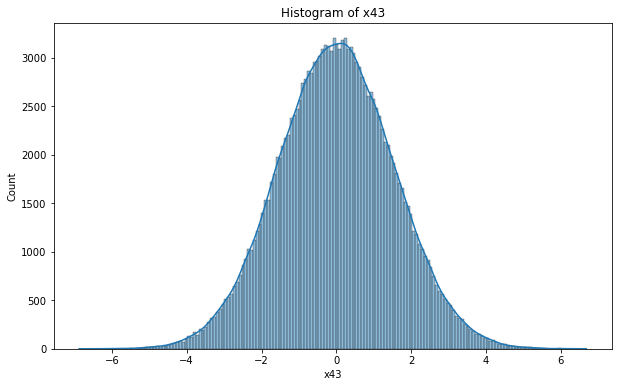

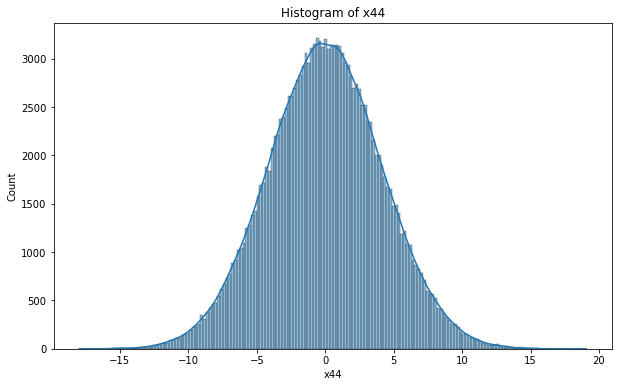

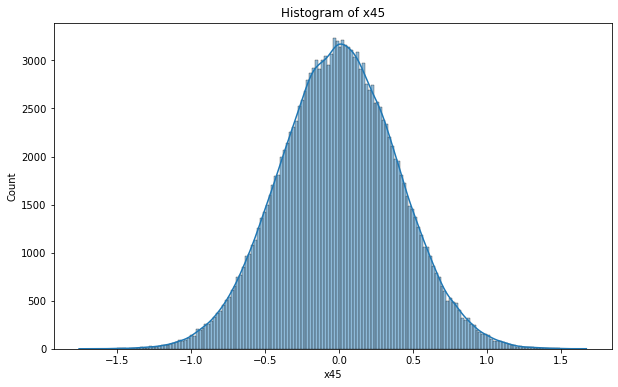

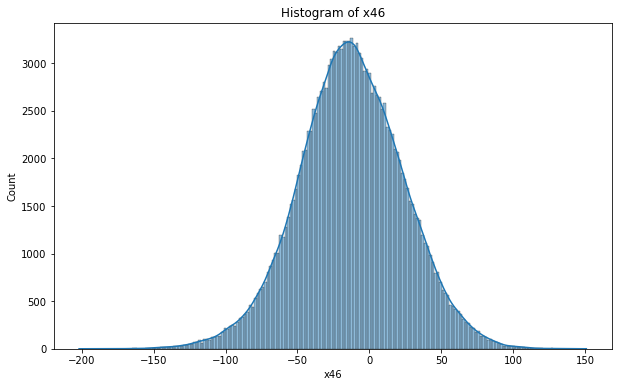

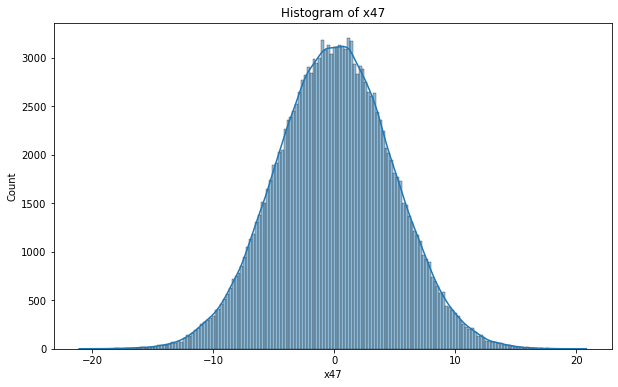

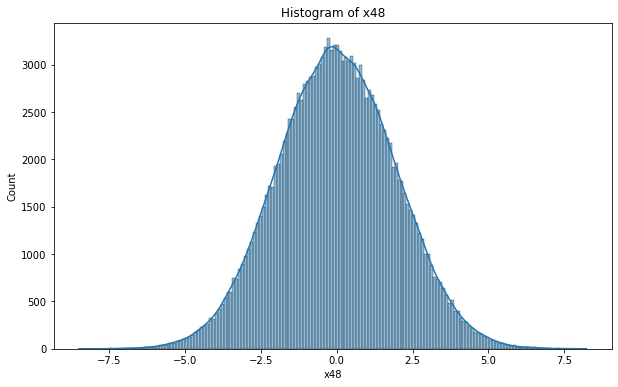

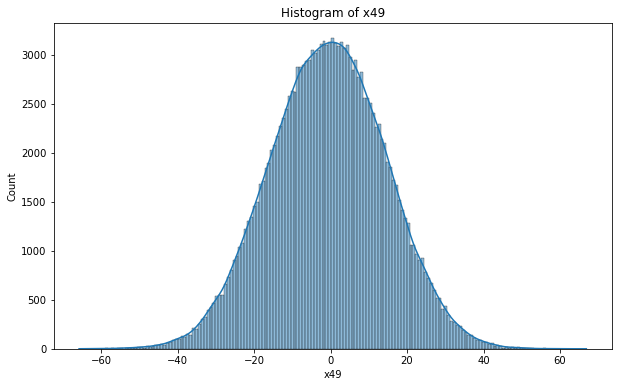

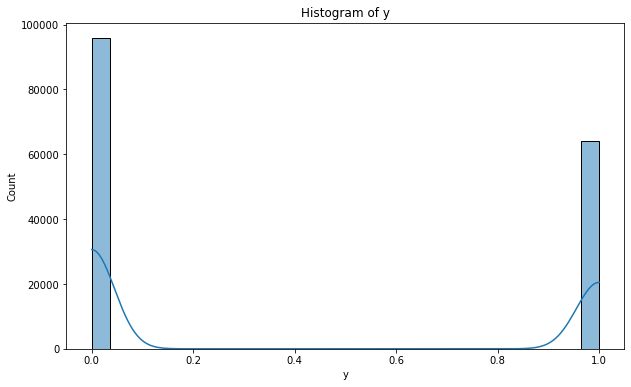

In [18]:
# Univariate analysis for each numeric feature
for column in df.select_dtypes(include='number').columns:
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()


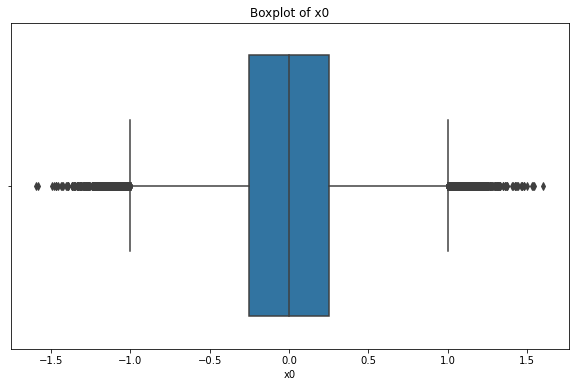

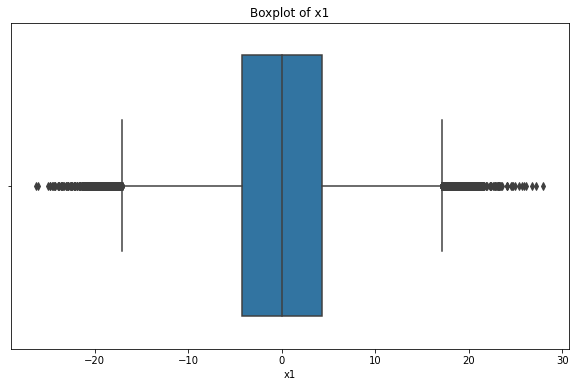

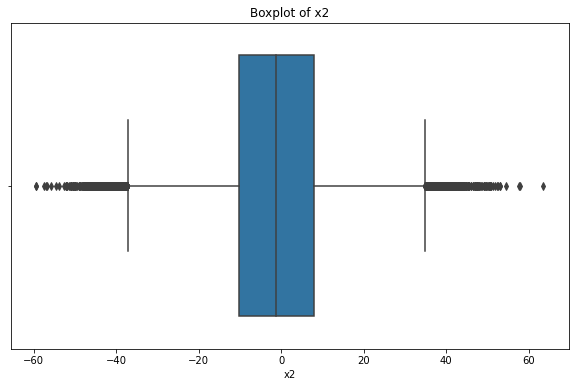

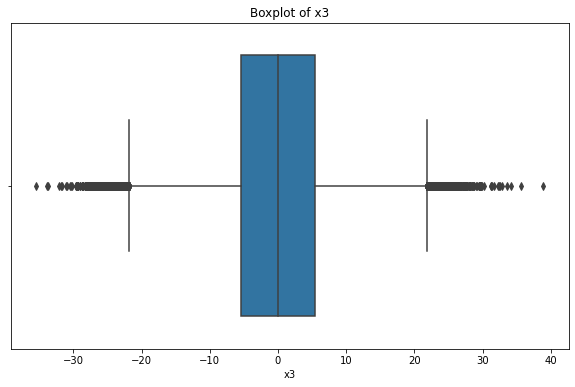

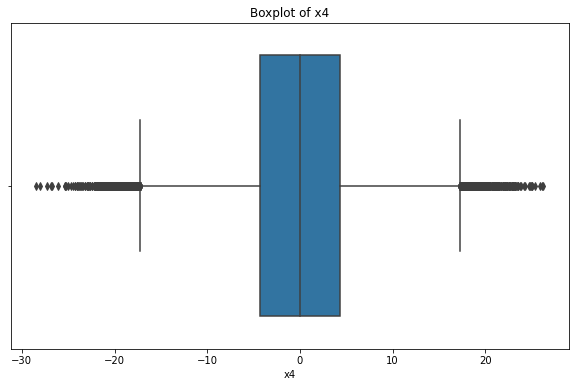

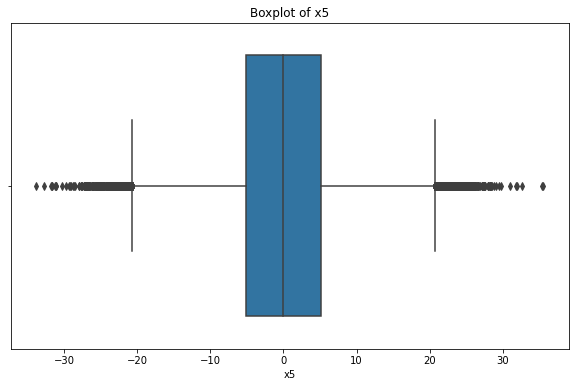

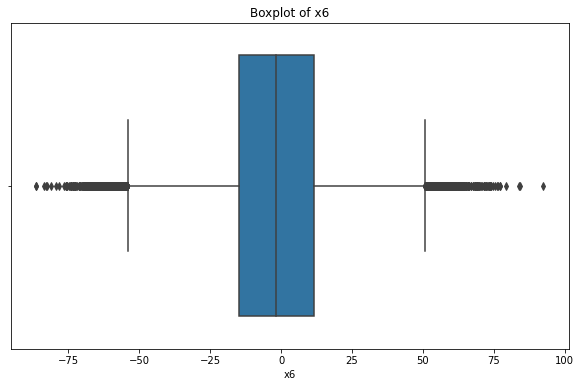

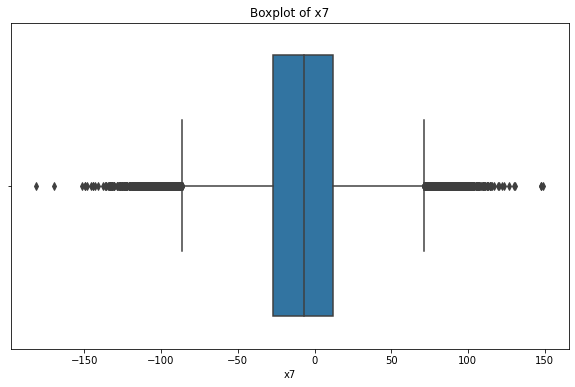

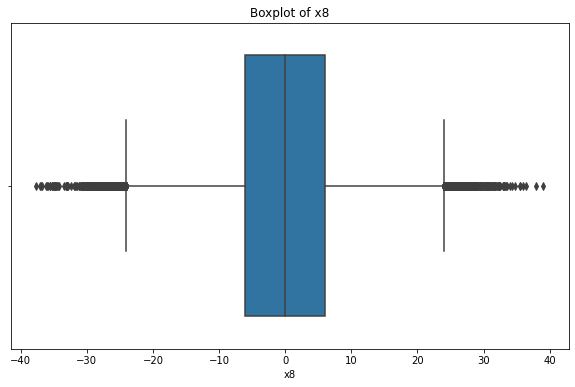

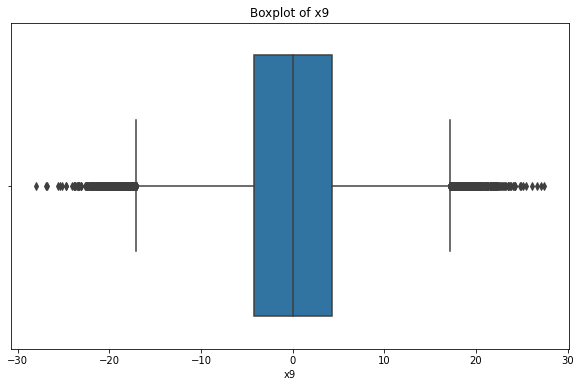

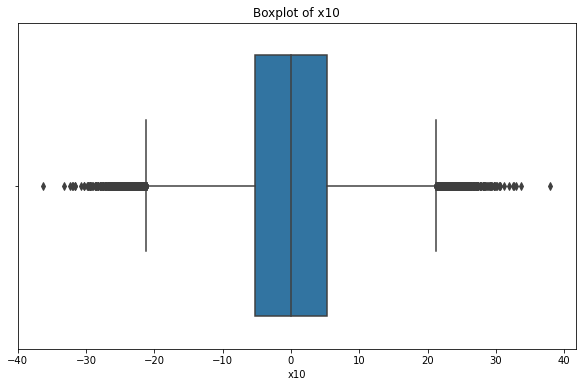

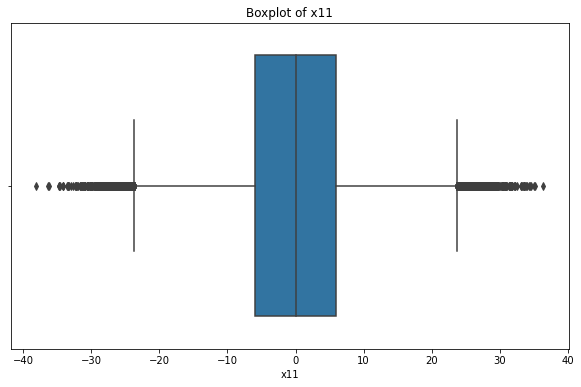

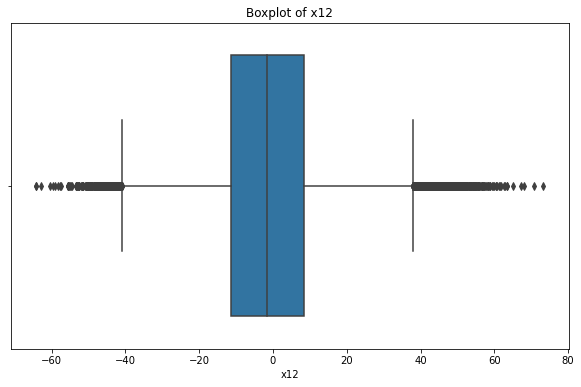

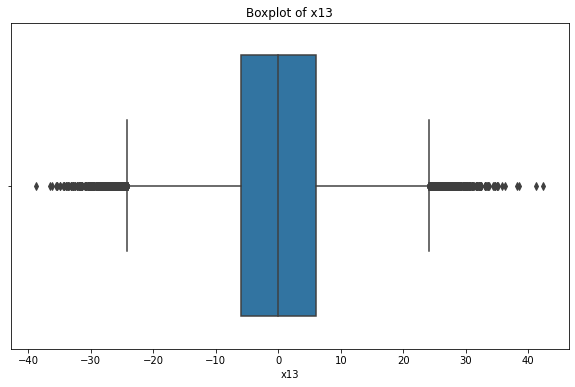

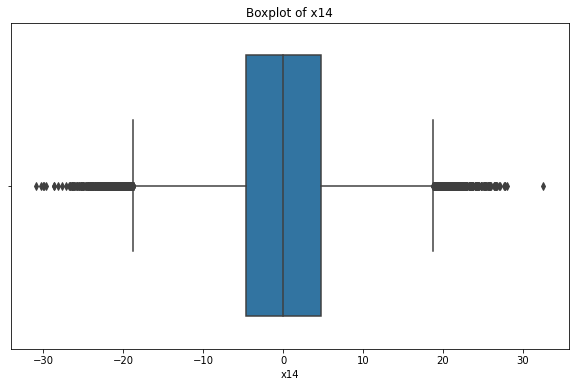

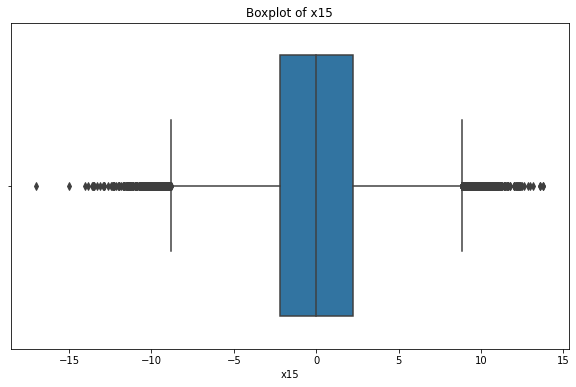

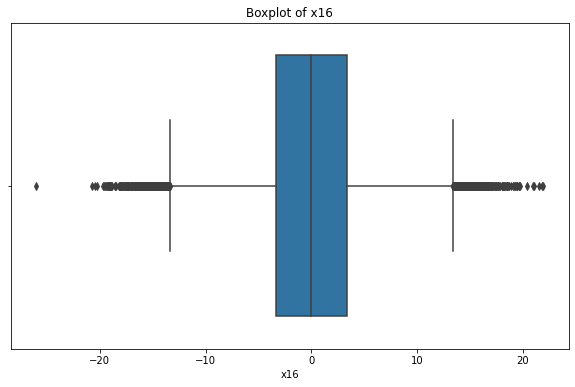

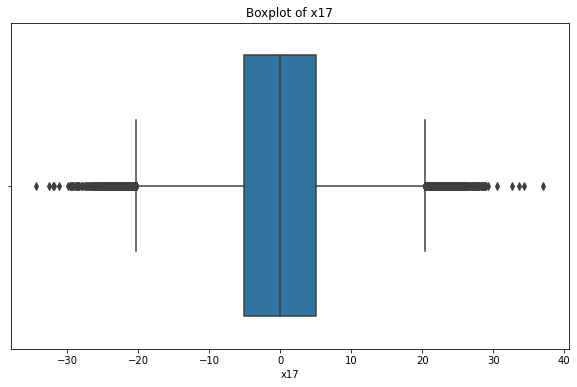

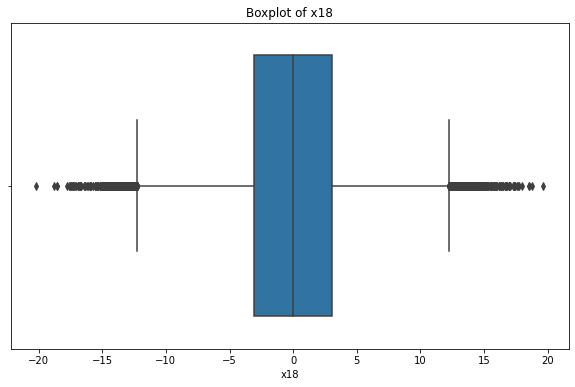

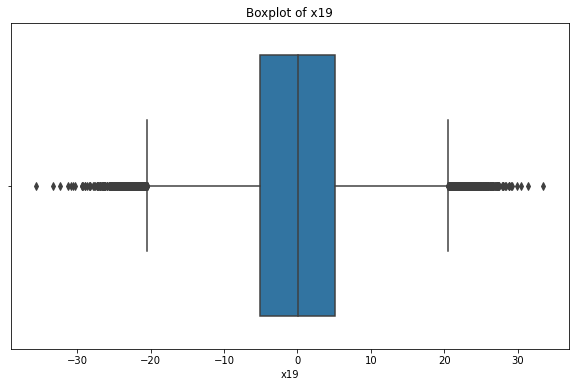

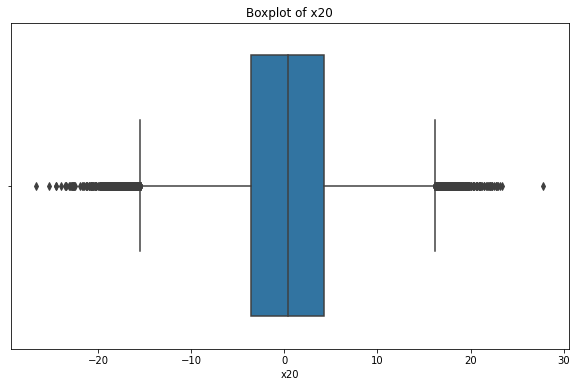

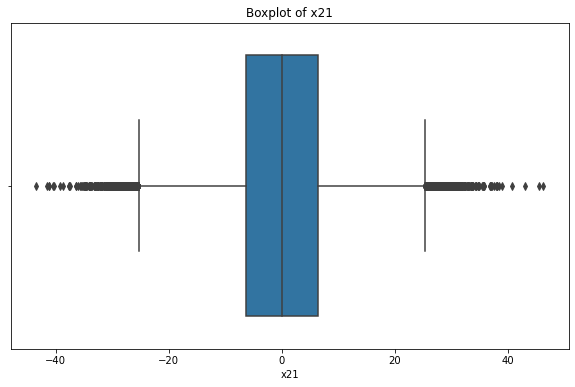

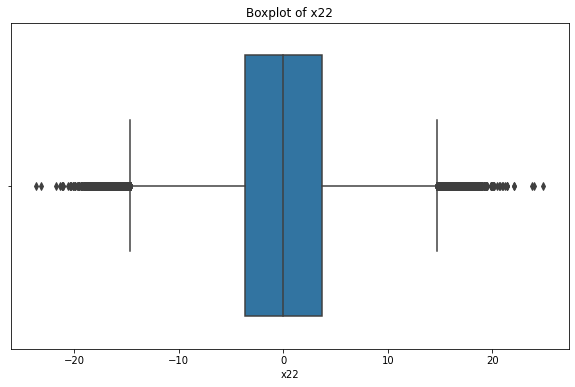

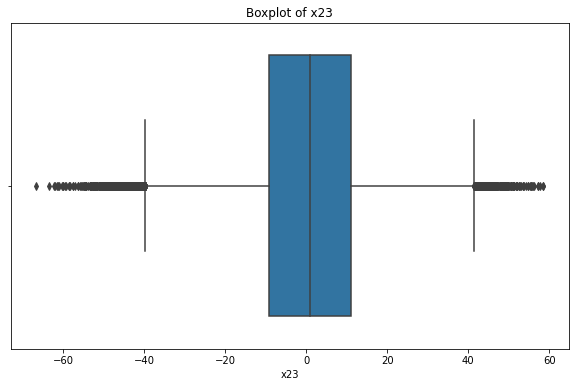

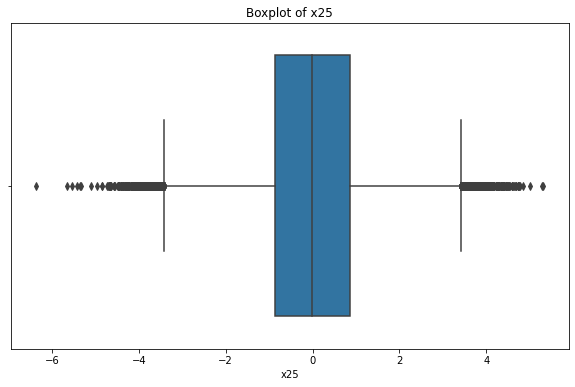

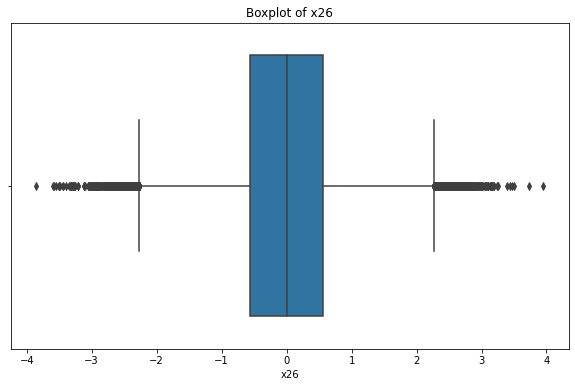

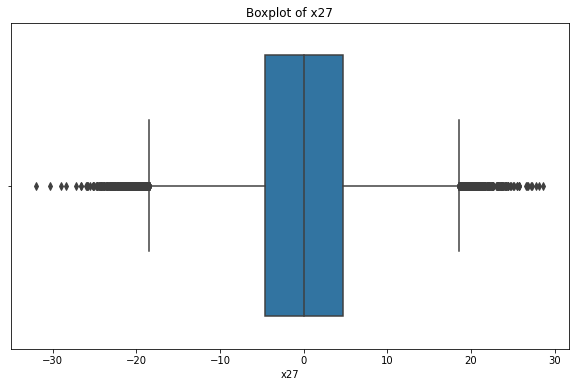

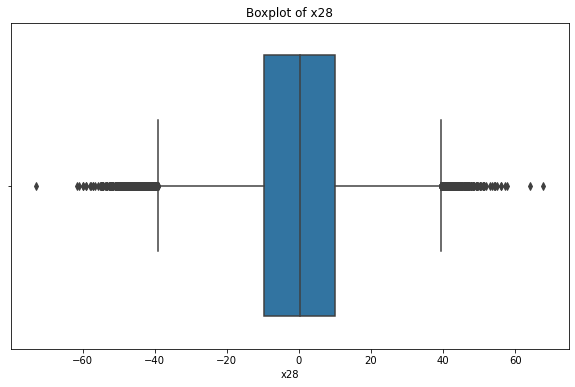

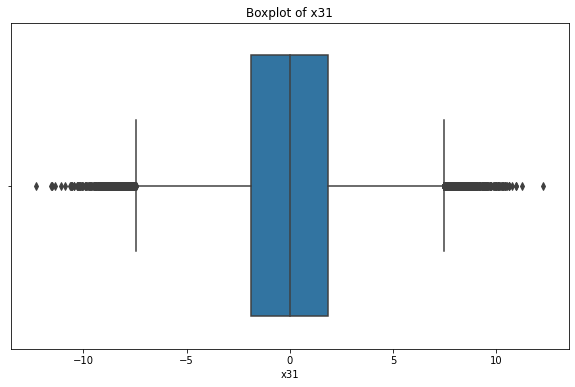

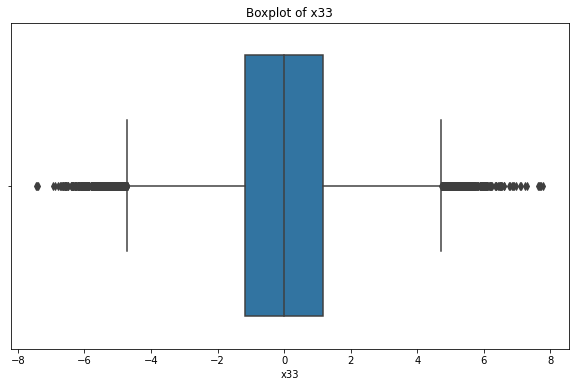

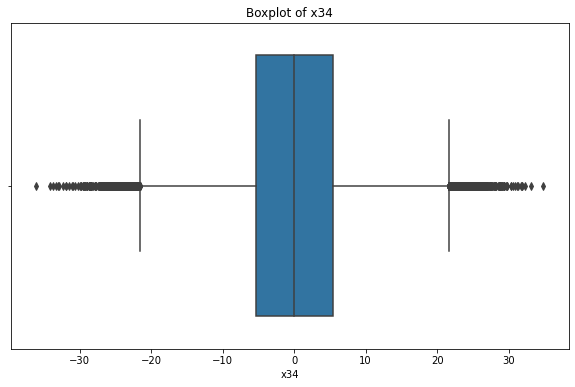

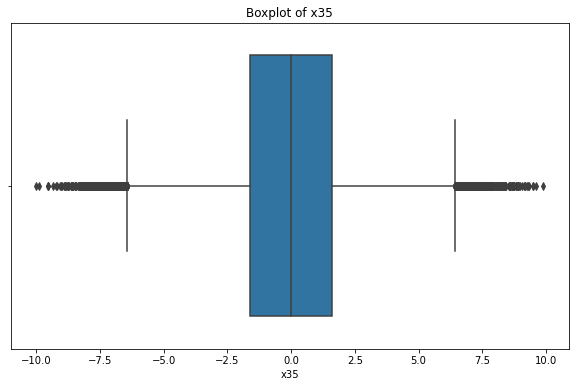

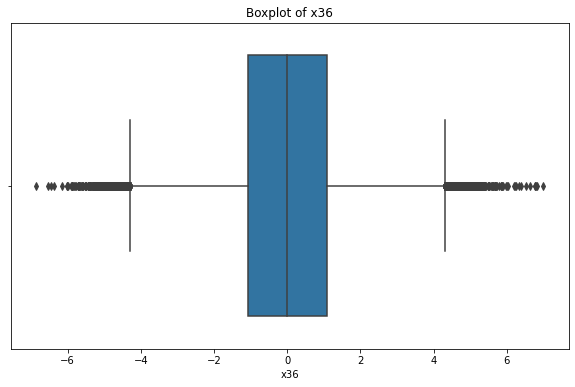

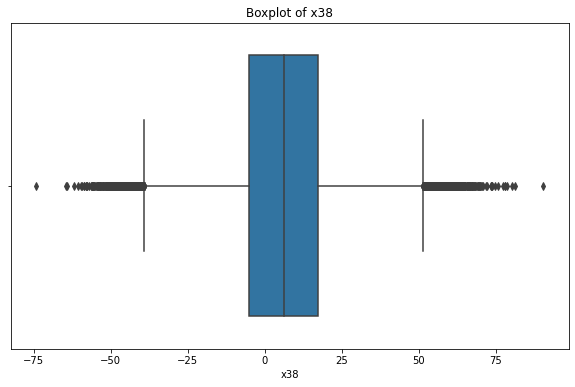

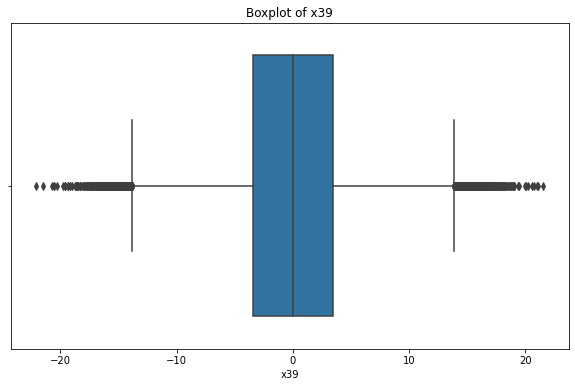

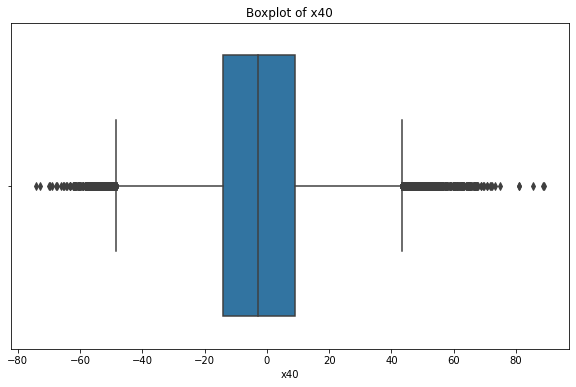

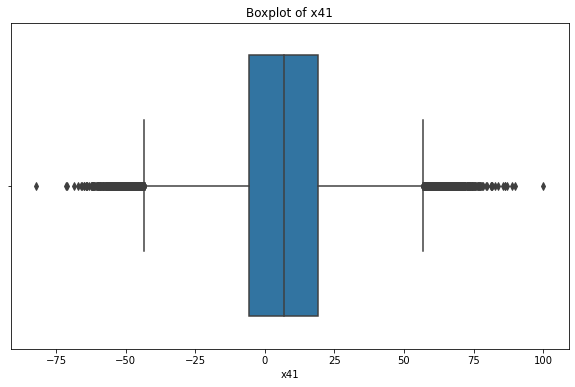

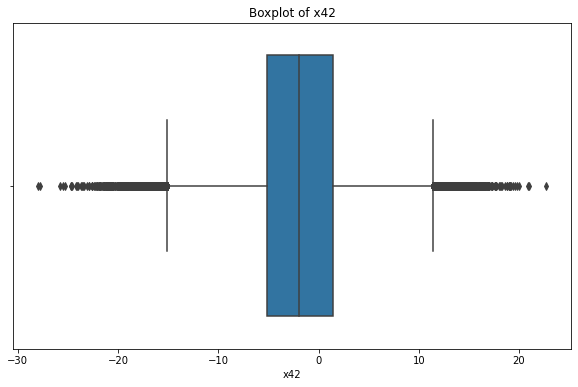

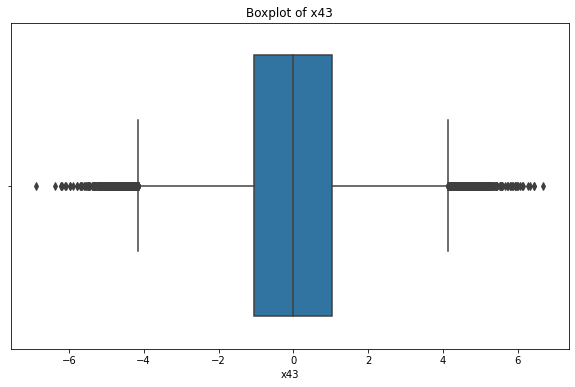

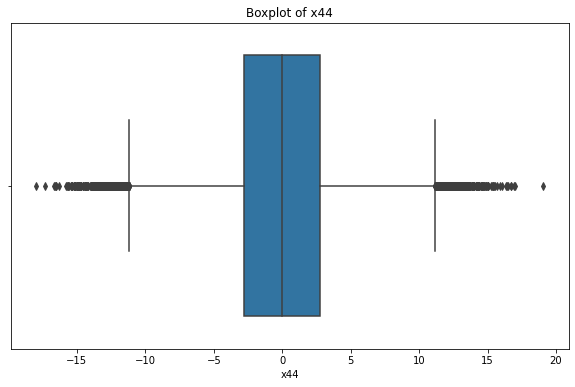

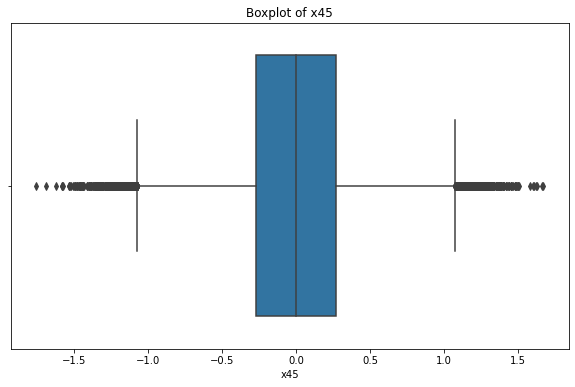

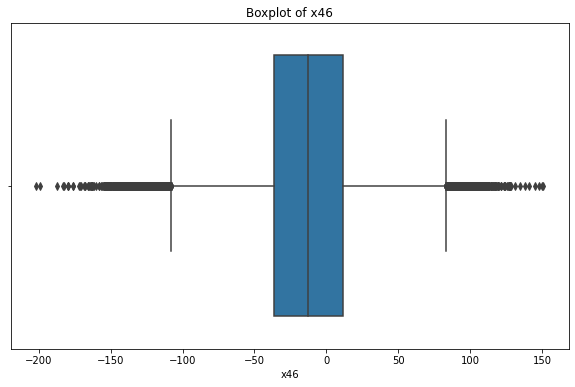

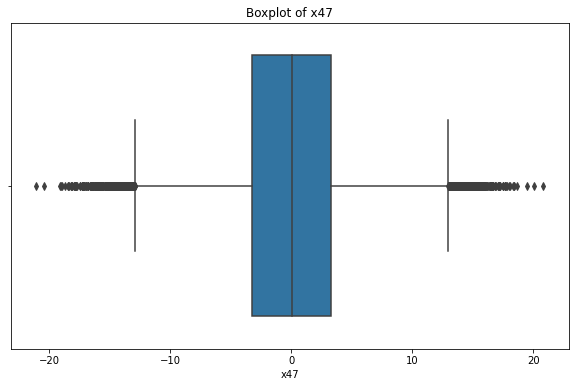

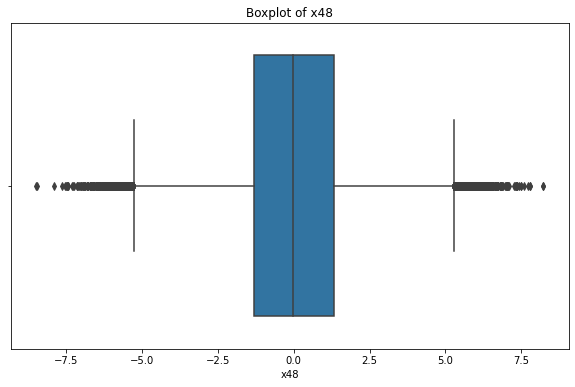

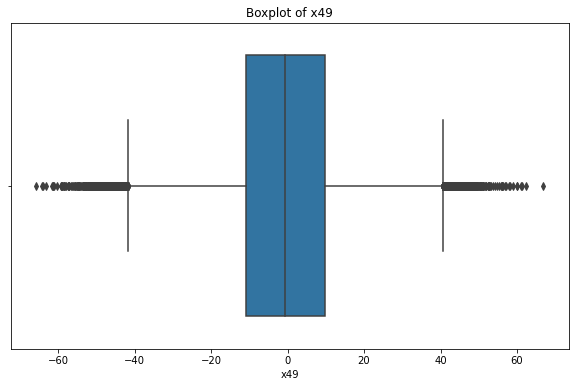

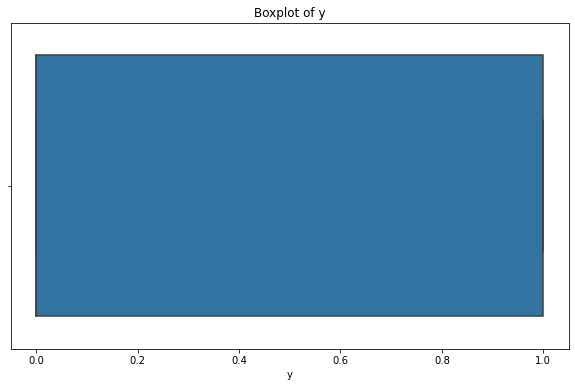

In [19]:
# Univariate analysis for each numeric feature
for column in df.select_dtypes(include='number').columns:
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()



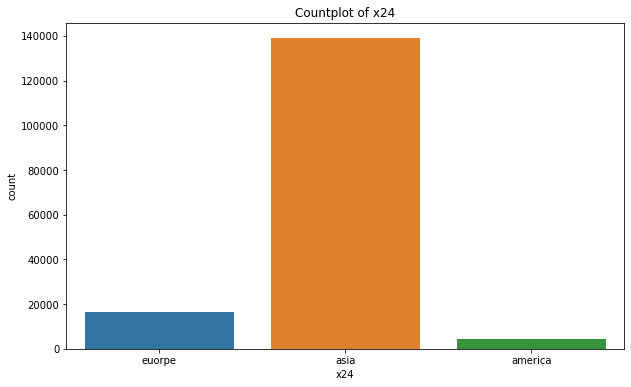

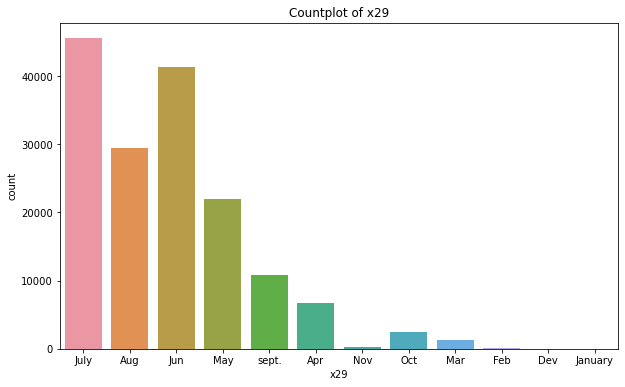

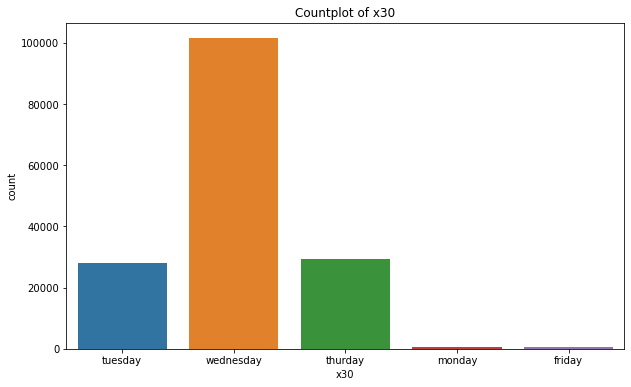

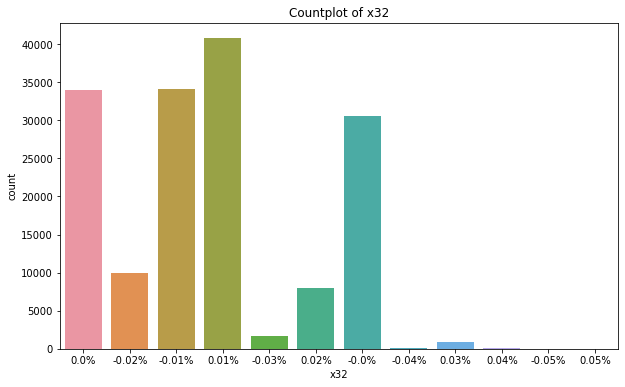

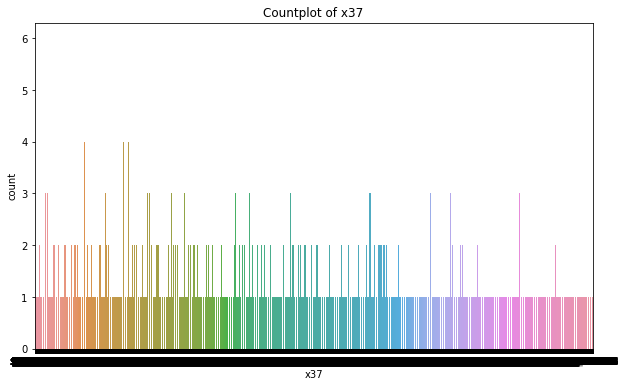

In [20]:
# Univariate analysis for each categorical feature
for column in df.select_dtypes(include='object').columns:
    # Countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
    plt.show()

In [21]:
df.x37

0          $1313.96
1          $1962.78
2           $430.47
3         $-2366.29
4          $-620.66
            ...    
159995     $-891.96
159996     $1588.65
159997      $687.46
159998      $439.21
159999    $-1229.34
Name: x37, Length: 160000, dtype: object

x37 and x32 should be handled converted to numerics during imputating any missing data.

### Imputation

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
print(df.columns)


Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y'],
      dtype='object')


In [24]:
# Select the target variable with missing trainues
target_variable = 'y'

# Identify numeric and categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Create a DataFrame without missing trainues in the target variable
df_no_missing = df.dropna(subset=[target_variable])

In [25]:
# Remove "%" from x32 and convert to numeric
df['x32'] = pd.to_numeric(df['x32'].str.replace('%', ''), errors='coerce')

# Remove "$" from x37 and convert to numeric
df['x37'] = pd.to_numeric(df['x37'].str.replace('$', ''), errors='coerce')


In [26]:
print(df[['x32', 'x37']].head())


    x32      x37
0  0.00  1313.96
1 -0.02  1962.78
2 -0.01   430.47
3  0.01 -2366.29
4  0.01  -620.66


In [27]:
df.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [28]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

In [29]:
X = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [30]:
print(X.columns)

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33',
       'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43',
       'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y', 'x24_asia', 'x24_euorpe',
       'x29_Aug', 'x29_Dev', 'x29_Feb', 'x29_January', 'x29_July', 'x29_Jun',
       'x29_Mar', 'x29_May', 'x29_Nov', 'x29_Oct', 'x29_sept.', 'x30_monday',
       'x30_thurday', 'x30_tuesday', 'x30_wednesday'],
      dtype='object')


In [31]:
# Features with Null trainues and Percent missing
null_df = pd.DataFrame(X[X.columns[X.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'trainue']
null_df['Percent'] = round((null_df['trainue'] / X.shape[0] * 100),2)

null_df

,Feature,trainue,Percent
0,x0,26,0.02
1,x1,25,0.02
2,x2,38,0.02
3,x3,37,0.02
4,x4,26,0.02
5,x5,37,0.02
6,x6,26,0.02
7,x7,27,0.02
8,x8,21,0.01
9,x9,30,0.02


In [32]:
from sklearn.impute import SimpleImputer

# Identify columns with missing trainues
columns_with_missing = X.columns[X.isnull().any()]

# Create a SimpleImputer with the "most_frequent" strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the entire DataFrame
X[columns_with_missing] = imputer.fit_transform(X[columns_with_missing])

# Check for missing trainues after imputation
print(X.isnull().sum())


C:\Users\rwbut\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


x0               0
x1               0
x2               0
x3               0
x4               0
                ..
x29_sept.        0
x30_monday       0
x30_thurday      0
x30_tuesday      0
x30_wednesday    0
Length: 65, dtype: int64


### Modeling 

#### Logistic Regression

In [33]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features (X) and target variable (y)
X = X.drop('y', axis=1)  # Remove the target variable from features
y = df['y']


In [34]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)


In [35]:

# Initialize the Logistic Regression model
model = LogisticRegression()


In [36]:
# Cross-trainidate the model and print accuracy for each fold
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-trainidated Accuracy:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


C:\Users\rwbut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rwbut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross-trainidated Accuracy: [0.69972656 0.70015625 0.70453125 0.70511719 0.70558594]
Mean Accuracy: 0.7030234375


C:\Users\rwbut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:

# Fit the model on the training data
model.fit(X_train, y_train)



C:\Users\rwbut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)


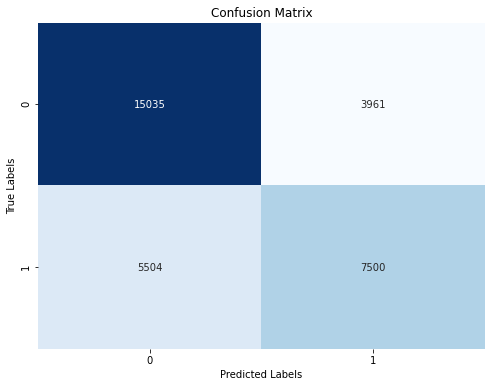


Accuracy on Test Set: 0.70421875

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     18996
           1       0.65      0.58      0.61     13004

    accuracy                           0.70     32000
   macro avg       0.69      0.68      0.69     32000
weighted avg       0.70      0.70      0.70     32000



In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Etrainuate the model
print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: The accuracy of 70.4% is a good starting point, but it's always essential to consider other metrics, especially in imbalanced datasets.

Confusion Matrix:

True Positives (TP): 7533
True Negatives (TN): 14994
False Positives (FP): 4002
False Negatives (FN): 5471
Classification Report:

Precision: The precision for class 1 is 0.65, indicating that when the model predicts class 1, it's correct 65% of the time.
Recall: The recall for class 1 is 0.58, showing that the model correctly identifies 58% of actual class 1 instances.
F1-score: The F1-score is the harmonic mean of precision and recall. A higher F1-score indicates a better balance between precision and recall.

#### Random Foreset Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [41]:

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=117)

In [42]:
# Perform cross-trainidation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=117)

In [43]:
# Calculate cross-trainidated predicted probabilities
y_scores_cv = cross_val_predict(rf_classifier, X, y, cv=cv, method='predict_proba')[:, 1]

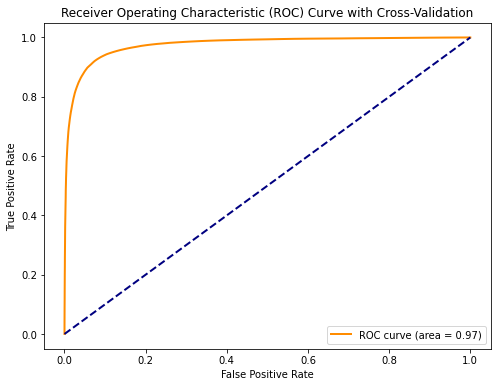

In [ ]:
# Compute ROC curve and ROC area for each class
fpr_cv, tpr_cv, _ = roc_curve(y, y_scores_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cv))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Cross-trainidation')
plt.legend(loc='lower right')
plt.show()


The area under the ROC curve (AUC-ROC) is a metric that quantifies the overall performance of a binary classification model across various thresholds. The ROC curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) as the discrimination threshold is varied.

Here's how to interpret the AUC-ROC:

Perfect Classifier: If the AUC-ROC is 1.0, it means the model has a perfect ability to distinguish between the positive and negative classes. The ROC curve reaches the top-left corner, indicating a high true positive rate and a low false positive rate.

Random Classifier: If the AUC-ROC is around 0.5, it suggests that the model performs no better than random chance. The ROC curve follows the diagonal line.

Good Classifier: The higher the AUC-ROC, the better the model at distinguishing between positive and negative instances. An AUC-ROC of 0.97 is considered very good, indicating strong discriminatory power.

In summary, an AUC-ROC of 0.97 suggests that your model has a high true positive rate and a low false positive rate across different threshold trainues, demonstrating excellent performance in distinguishing between the two classes.

In [44]:
# Calculate and print cross-trainidated accuracy
accuracy_cv = cross_val_score(rf_classifier, X, y, cv=cv, scoring='accuracy')
print("Cross-trainidated Accuracy: {:.2f}".format(accuracy_cv.mean()))

Cross-trainidated Accuracy: 0.92


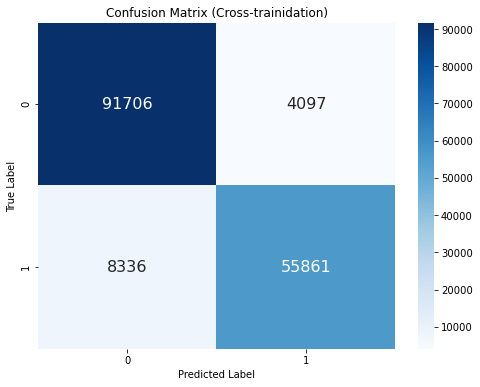

Classification Report (Cross-trainidation):
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     95803
           1       0.93      0.87      0.90     64197

    accuracy                           0.92    160000
   macro avg       0.92      0.91      0.92    160000
weighted avg       0.92      0.92      0.92    160000



In [45]:
# Obtain cross-trainidated predictions
y_pred_cv = cross_val_predict(rf_classifier, X, y, cv=cv, method='predict')

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y, y_pred_cv)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix (Cross-trainidation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report (Cross-trainidation):\n", classification_report(y, y_pred_cv))


Precision:

Class 0 (Negative class): Precision is 0.92. This means that out of all instances predicted as class 0, 92% are actually class 0. It's the ability of the classifier not to label a positive sample as negative.

Class 1 (Positive class): Precision is 0.93. This means that out of all instances predicted as class 1, 93% are actually class 1. It's the ability of the classifier not to label a negative sample as positive.

Overall: The classifier has high precision for both classes, indicating a low rate of false positives.

Recall (Sensitivity):

Class 0 (Negative class): Recall is 0.96. This means that out of all actual instances of class 0, the classifier correctly identifies 96% of them. It's the ability of the classifier to find all the positive samples.

Class 1 (Positive class): Recall is 0.87. This means that out of all actual instances of class 1, the classifier correctly identifies 87% of them. It's the ability of the classifier to find all the negative samples.

Overall: The classifier has high recall for both classes, indicating a low rate of false negatives.

F1-Score:

Class 0 (Negative class): F1-score is 0.94. It's the harmonic mean of precision and recall. A high F1-score indicates a good balance between precision and recall.

Class 1 (Positive class): F1-score is 0.90. Similar to class 0, it's a good balance between precision and recall.

Overall: The weighted average of F1-scores for both classes is 0.92, indicating good overall model performance.

In summary, the classification report provides a detailed assessment of the model's performance for each class, considering both false positives (precision) and false negatives (recall), which is crucial in scenarios where one type of error may be more costly than the other. The high precision and recall trainues suggest that the model is effective in making accurate predictions for both positive and negative classes.

In [46]:
Total_Cost = (4097 * 40) + (8336 * 100)
print(f"Total Cost: ${Total_Cost}")

Total Cost: $997480


#### XGBoost Model

In [38]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np

In [40]:
# Reset index 
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [41]:
# Define your XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic',  
    eval_metric='logloss',        
    use_label_encoder=False       
)

In [42]:
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=117)

In [43]:
# Initialize variables to store overall metrics
all_conf_matrices = np.zeros((2, 2))  
all_accuracies = []

# Perform cross-validation
for train_idx, val_idx in cv.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Fit the XGBoost model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Compute confusion matrix for the current fold
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Update overall metrics
    all_conf_matrices += conf_matrix
    accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
    all_accuracies.append(accuracy)

In [44]:

# Display overall results
mean_accuracy = np.mean(all_accuracies)
mean_conf_matrix = all_conf_matrices / cv.get_n_splits()
print("Mean Accuracy:", mean_accuracy)
print("Mean Confusion Matrix:")
print(mean_conf_matrix)

Mean Accuracy: 0.928375
Mean Confusion Matrix:
[[18140.8  1019.8]
 [ 1272.2 11567.2]]


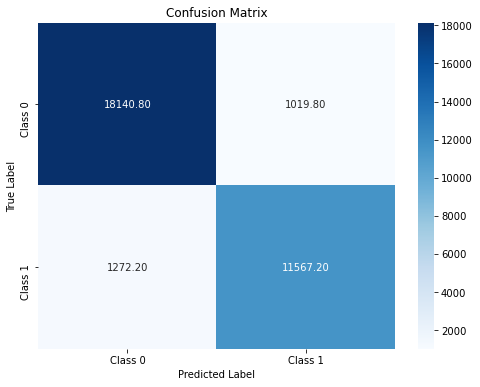

In [45]:
# Define class labels 
class_labels = ['Class 0', 'Class 1']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mean_conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
xgb_Total_Cost = (1019.8 * 40) + (1272.2 * 100)
print(f"Total Cost: ${xgb_Total_Cost}")

Total Cost: $168012.0


#### Tensor Flow Model

In [64]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import save_model, load_model


In [72]:


# Create a simple feedforward neural network
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



In [73]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mean_squared_error','mean_absolute_error'])


In [74]:
# Create lists to store accuracy trainues during training
train_accuracy = []
train_accuracy = []
train_loss = []
loss = []



In [75]:
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=117)

# Initialize variables to store overall metrics
all_conf_matrices = []
all_accuracies = []

# Perform cross-validation
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the model on the training data
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

    # Make predictions on the test set
    y_pred_probs = model.predict(X_test)
    y_pred = np.round(y_pred_probs)  # Assuming binary classification

    # Convert true labels to integers
    y_test_int = y_test.astype(int)

    # Compute confusion matrix for the current fold
    conf_matrix = confusion_matrix(y_test_int, y_pred)

    # Display confusion matrix for the current fold
    print(f"Confusion Matrix - Fold {len(all_conf_matrices) + 1}:")
    print(conf_matrix)

    # Append the confusion matrix to the list
    all_conf_matrices.append(conf_matrix)

    # Calculate accuracy for the current fold
    accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
    print(f"Accuracy - Fold {len(all_accuracies) + 1}: {accuracy}")
    all_accuracies.append(accuracy)

# Display overall results
mean_accuracy = np.mean(all_accuracies)
mean_conf_matrix = np.mean(all_conf_matrices, axis=0)
print("Mean Accuracy:", mean_accuracy)
print("Mean Confusion Matrix:")
print(mean_conf_matrix)


Epoch 1/50
4000/4000 [==============================] - 7s 2ms/step - loss: 0.5028 - accuracy: 0.7345 - mean_squared_error: 0.1655 - mean_absolute_error: 0.3193 - val_loss: 0.4432 - val_accuracy: 0.7903 - val_mean_squared_error: 0.1419 - val_mean_absolute_error: 0.2553
Epoch 2/50
4000/4000 [==============================] - 6s 2ms/step - loss: 0.3248 - accuracy: 0.8611 - mean_squared_error: 0.0999 - mean_absolute_error: 0.1976 - val_loss: 0.2946 - val_accuracy: 0.8783 - val_mean_squared_error: 0.0888 - val_mean_absolute_error: 0.1790
Epoch 3/50
4000/4000 [==============================] - 6s 2ms/step - loss: 0.2545 - accuracy: 0.8973 - mean_squared_error: 0.0755 - mean_absolute_error: 0.1507 - val_loss: 0.2310 - val_accuracy: 0.9089 - val_mean_squared_error: 0.0673 - val_mean_absolute_error: 0.1412
Epoch 4/50
4000/4000 [==============================] - 6s 2ms/step - loss: 0.2154 - accuracy: 0.9158 - mean_squared_error: 0.0623 - mean_absolute_error: 0.1253 - val_loss: 0.2042 - val_accu

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6,913
Trainable params: 6,913
Non-trainable params: 0
_________________________________________________________________


In [86]:
nn_Total_Cost = (434.4 * 40) + (444.6 * 100)
print(f"Total Cost: ${nn_Total_Cost}")

Total Cost: $61836.0
